<a href="https://colab.research.google.com/github/edkambeu/my_first_deep_learning_project/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing relavant modules 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 

 

11501568/11490434 [==============================] - 0s 0us/step


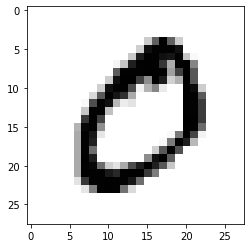

In [ ]:
#Load data
mnist_data = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()
#Show the first image in the dataset
plt.imshow(x_train[1], cmap= 'gray_r')


In [ ]:
#Scaling the image pixel values to between 0 and 1 
x_train , x_test = x_train/255.0 , x_test/255.0
#Reserving validation data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.20)
#Printing the shapes of the data
print('Train:', x_train.shape)
print('Validation:', x_val.shape)
print('Test:', x_test.shape)

Train: (48000, 28, 28)
Validation: (12000, 28, 28)
Test: (10000, 28, 28)


In [ ]:
#Build a model  
model = keras.Sequential( [
 layers.Flatten(input_shape = (28,28)),
 layers.Dense(128, activation = 'relu'),
  layers.Dense(10, activation = 'softmax')]  
)

In [ ]:
#Compile a model
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])


In [ ]:
#Fit a model 
history = model.fit(
    x_train,
     y_train,
     epochs = 5,
      batch_size = 50,
      validation_data = (x_val, y_val),
      verbose = 0 ) 


In [ ]:
#Plot learning curves to check underfitting and overfitting 
history_df = pd.DataFrame(history.history)
print(history_df.head())


       loss  accuracy  val_loss  val_accuracy
0  0.314938  0.910563  0.179454      0.946833
1  0.142250  0.958979  0.132017      0.961167
2  0.099430  0.971083  0.106364      0.967667
3  0.075235  0.977333  0.098339      0.969917
4  0.059460  0.982208  0.090099      0.972583


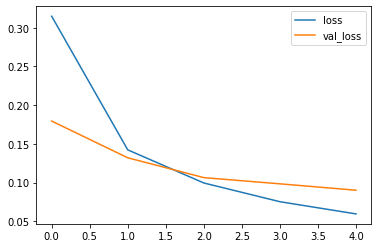

In [ ]:
# Plotting the learning curves to identify underfitting and overfitting
cols = ['loss', 'val_loss'] 
history_df[cols].plot()


In [ ]:
#Evaluate a model
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0809 - accuracy: 0.9739


[0.08089613169431686, 0.9739000201225281]